#### Random Number Generator


In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

In [4]:
# a)

a = 1597
b = 51749
M = 244944
N = 24234

def rng(N, a, b, M, nsamples=None):
    if nsamples is None:
        nsamples = M
    U = []
    for i,e in enumerate(range(nsamples)):
        N = (a*N + b) % M
        U.append(N/M)
    return U

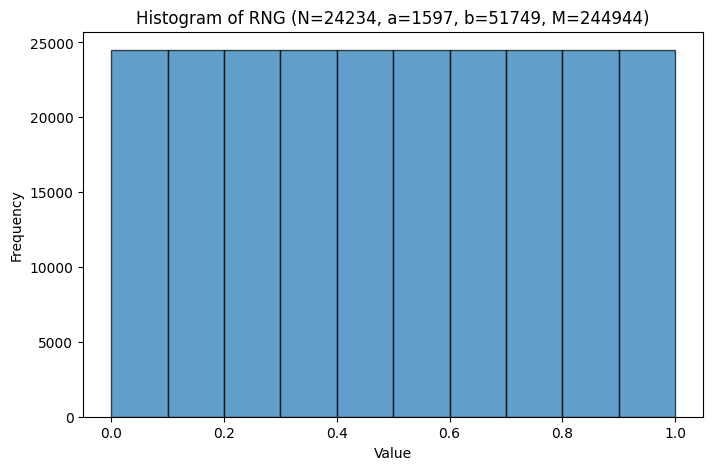

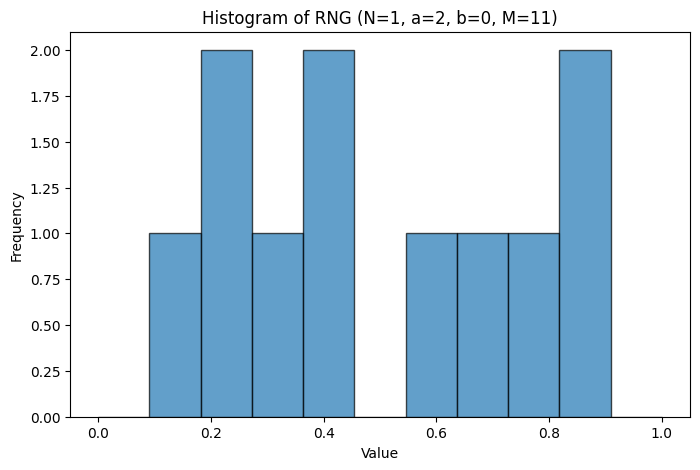

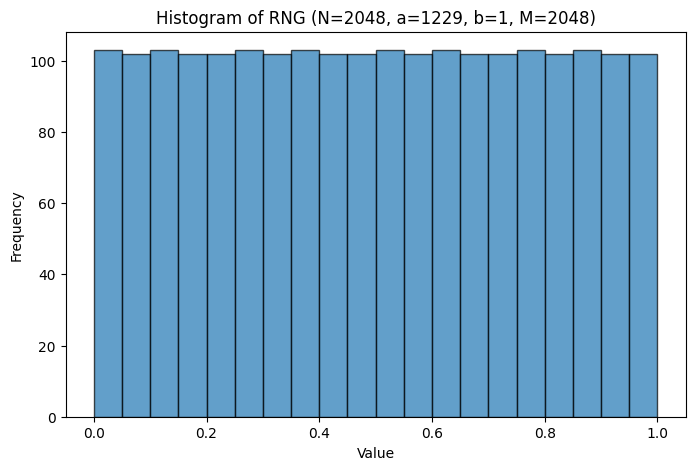

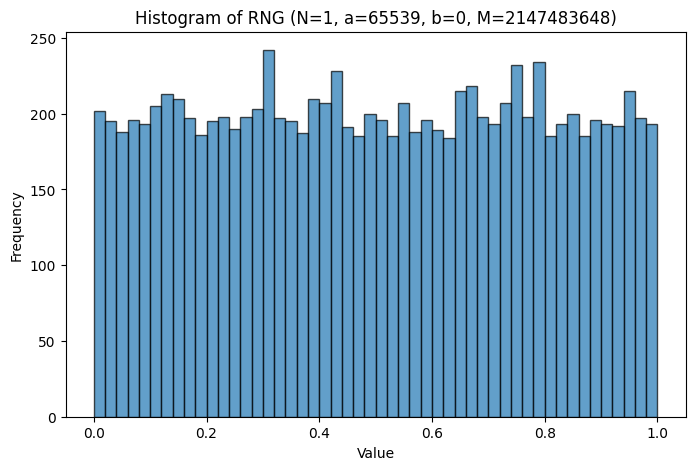

In [5]:
# b) i)
bins = 10

def histogram(N, a, b, M, bins, nsamples=None):
    if nsamples is None:
        nsamples = M
    plt.figure(figsize=(8, 5))
    plt.hist(rng(N, a, b, M, nsamples), bins=bins, range = (0,1), edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of RNG (N={N}, a={a}, b={b}, M={M})')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

histogram(N, a, b, M, bins) # Good parameters
histogram(1, 2, 0, 11, 11) # Pathologic parameters 208
histogram(2048, 1229, 1, 2048, 20) # Pathologic parameters 209
histogram(1, 2**16 + 3, 0, 2**31, 50, nsamples=10000) # Pathologic parameters 210: RANDU

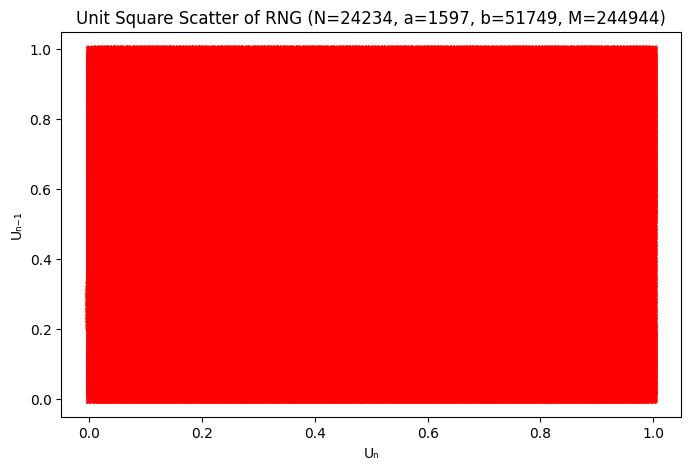

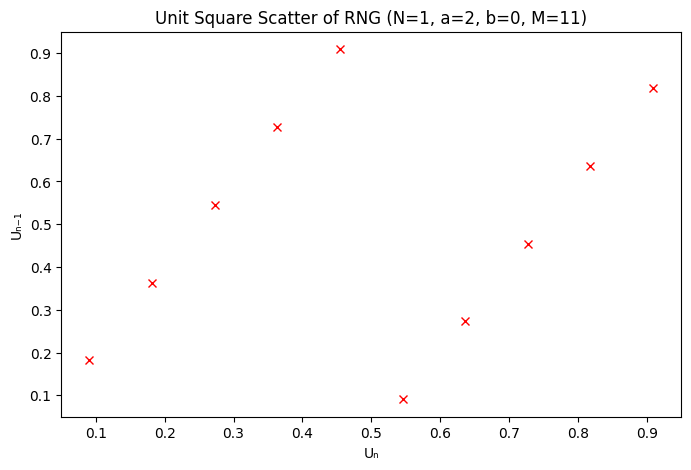

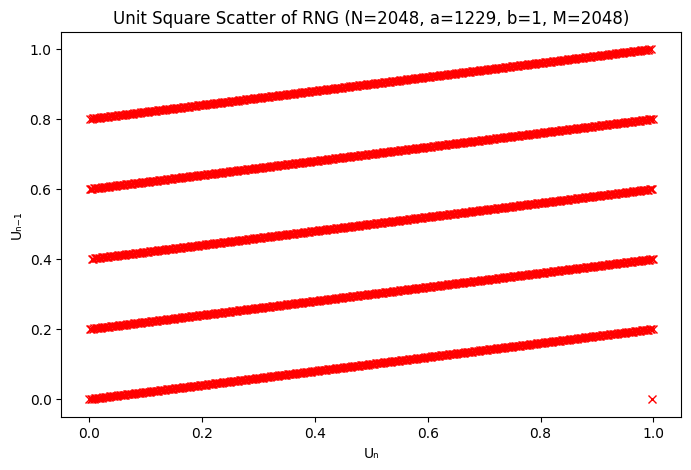

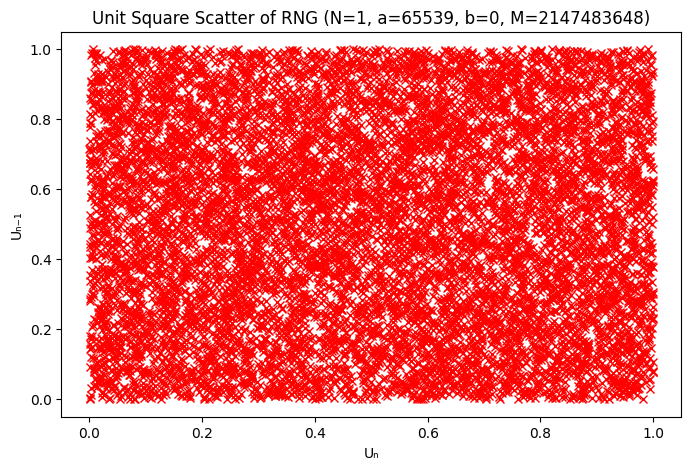

In [9]:
# b) ii)

def scatter_square(N, a, b, M, nsamples=None):
    if nsamples is None:
        nsamples = M

    rng_lst = rng(4, a, b, M, nsamples)
    x = rng_lst[:-1]
    y = rng_lst[1:]

    plt.figure(figsize=(8, 5))
    plt.xlabel('U\u2099')
    plt.ylabel('U\u2099\u208B\u2081')
    plt.plot(x, y, 'rx')
    plt.title(f'Unit Square Scatter of RNG (N={N}, a={a}, b={b}, M={M})')
    plt.show()

scatter_square(N, a, b, M)
scatter_square(1, 2, 0, 11) # Pathologic parameters 208
scatter_square(2048, 1229, 1, 2048) # Pathologic parameters 209
scatter_square(1, 2**16 + 3, 0, 2**31, nsamples=10000) # Pathologic parameters 210: RANDU


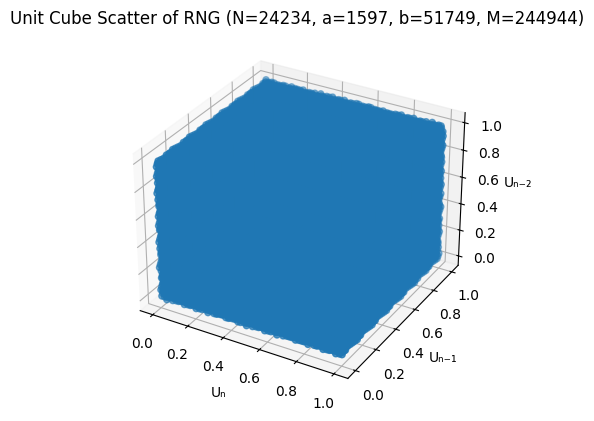

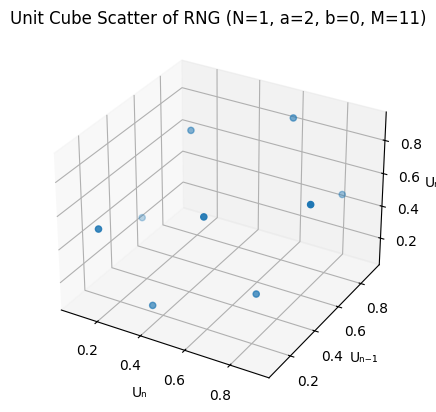

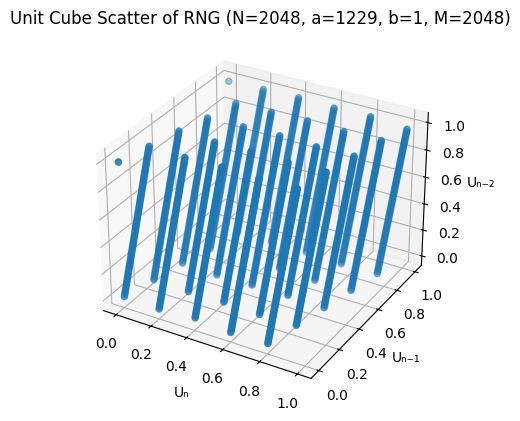

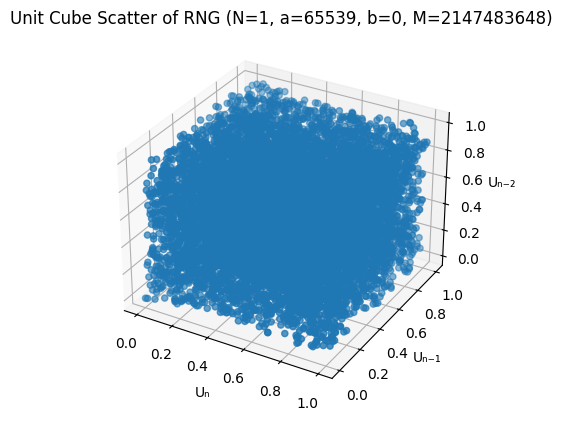

In [7]:
# b) iii)

def scatter_cube(N, a, b, M, nsamples=None):
    if nsamples is None:
        nsamples = M

    rng_lst = rng(4, a, b, M, nsamples)

    # Define coordinates in correct lag order
    x = rng_lst[2:]      # Uₙ
    y = rng_lst[1:-1]    # Uₙ₋₁
    z = rng_lst[:-2]     # Uₙ₋₂

    fig_3d = plt.figure()
    ax = fig_3d.add_subplot(1, 1, 1, projection="3d")

    ax.scatter(x, y, z)

    # Proper Unicode subscripts for labels
    ax.set_xlabel('U\u2099')         # Uₙ
    ax.set_ylabel('U\u2099\u208B\u2081')  # Uₙ₋₁
    ax.set_zlabel('U\u2099\u208B\u2082')  # Uₙ₋₂

    ax.set_title(f'Unit Cube Scatter of RNG (N={N}, a={a}, b={b}, M={M})')

    plt.show()

scatter_cube(N, a, b, M)
scatter_cube(1, 2, 0, 11) # Pathologic parameters 208
scatter_cube(2048, 1229, 1, 2048) # Pathologic parameters 209
scatter_cube(1, 2**16 + 3, 0, 2**31, nsamples=10000) # Pathologic parameters 210: RANDU

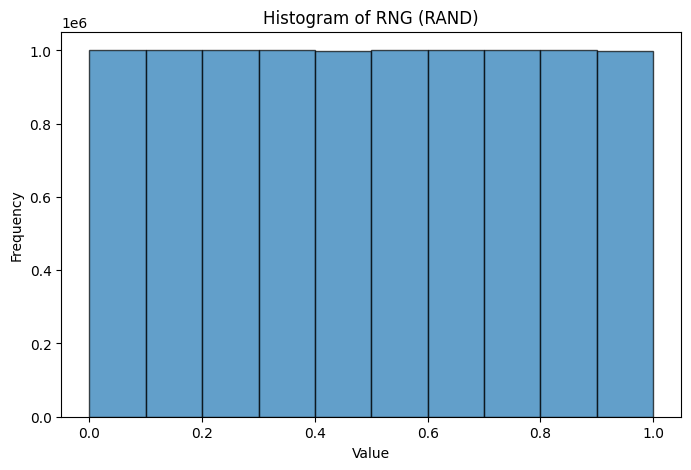

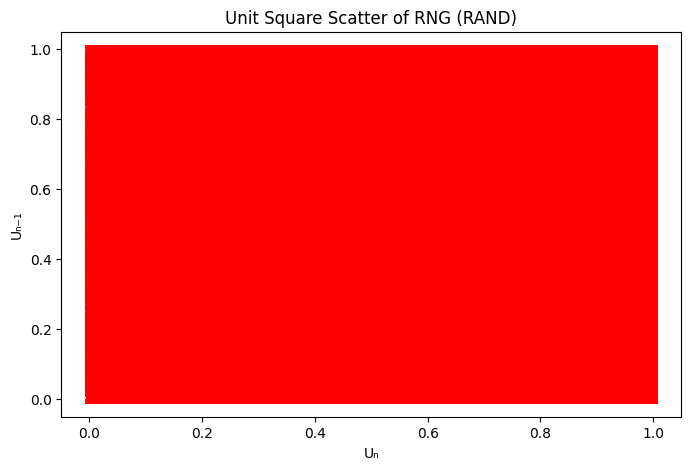

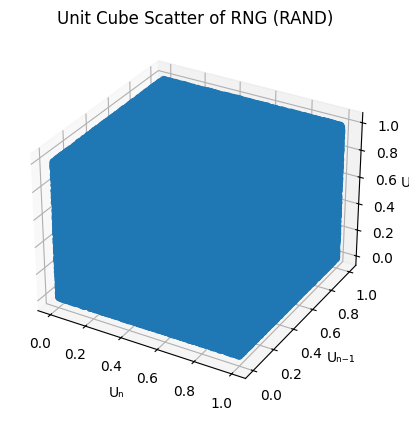

In [10]:
# c)

rng_lst = [random.uniform(0, 1) for i in range(10**7)]

## histogram
plt.figure(figsize=(8, 5))
plt.hist(rng_lst, bins=10, range = (0,1), edgecolor='black', alpha=0.7)
plt.title(f'Histogram of RNG (RAND)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

## scatter_square
x = rng_lst[:-1]
y = rng_lst[1:]

plt.figure(figsize=(8, 5))
plt.xlabel('U\u2099')
plt.ylabel('U\u2099\u208B\u2081')
plt.plot(x, y, 'rx')
plt.title(f'Unit Square Scatter of RNG (RAND)')
plt.show()

## scatter_cube

### Define coordinates in correct lag order
x = rng_lst[2:]      # Uₙ
y = rng_lst[1:-1]    # Uₙ₋₁
z = rng_lst[:-2]     # Uₙ₋₂

fig_3d = plt.figure()
ax = fig_3d.add_subplot(1, 1, 1, projection="3d")

ax.scatter(x, y, z)

### Proper Unicode subscripts for labels
ax.set_xlabel('U\u2099')         # Uₙ
ax.set_ylabel('U\u2099\u208B\u2081')  # Uₙ₋₁
ax.set_zlabel('U\u2099\u208B\u2082')  # Uₙ₋₂

ax.set_title(f'Unit Cube Scatter of RNG (RAND)')

plt.show()
